In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

from regression import normalEquation, extendMatrix, vectorCost, poly, linear


style.use('fivethirtyeight')
np.set_printoptions(precision=4)


In [2]:

degrees = [1, 2, 3, 4]
startYear = 1975
XeFit = []

df = pd.read_csv('datasets/housing_price_index.csv', header=None)

X = np.array(df.drop(columns=1, axis=1).T)
y = np.array(df.loc[:, 1])


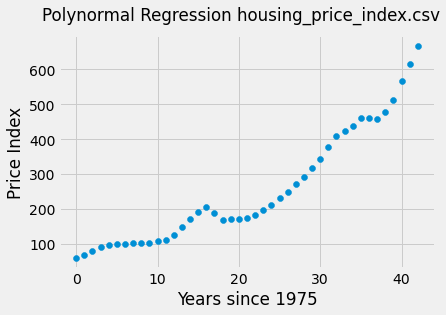

In [3]:


plt.suptitle("Polynormal Regression {}".format("housing_price_index.csv"))
plt.scatter(X[0], y)
plt.ylabel("Price Index")
plt.xlabel("Years since {}".format(startYear))
plt.show()


D = 1, cost = 2896.0936799814563
D = 2, cost = 585.0675759009071
D = 3, cost = 454.54345077269636
D = 4, cost = 443.76025218368926


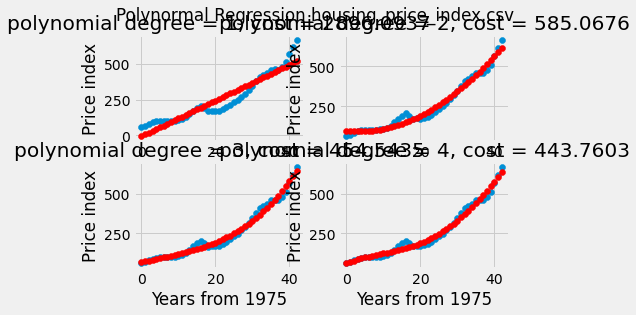

In [4]:

plt.suptitle("Polynormal Regression {}".format("housing_price_index.csv"))
for d in degrees:
    Xe = extendMatrix([X[0] for i in range(0, d)], True)
    beta = normalEquation(Xe, y)

    plti = plt.subplot(2, 2, d)
    plti.scatter(X[0], y)

    for x, _y in zip(X[0], y):
        predicted = linear(beta, [x ** (i + 1) for i in range(0, d)])

        plti.scatter(x, predicted, color='r')

    # Compute least square error.
    cost = vectorCost(beta, Xe, y)
    plti.set_title(
        "polynomial degree = {}, cost = {}".format(d, round(cost, 4)))
    plti.set_xlabel("Years from {}".format(startYear))
    plti.set_ylabel("Price index")
    print("D = {}, cost = {}".format(d, cost))

    # Add best fit
    XeFit.append([cost, beta])

plt.show()


In [5]:

# Extract the best fit beta
XeB = sorted(XeFit, key=itemgetter(0))
beta = XeB[0][1]
print("Best fit with cost of {} with degree {}.".format(
    XeB[0][0], len(beta) - 1))

# Final predicting testing.
testX = [2022 - startYear for i in range(0, len(beta) - 1)]
predicted = poly(beta, testX)
print("predicted house index for year 2022: {}".format(predicted))


Best fit with cost of 443.76025218368926 with degree 4.
predicted house index for year 2022: 799.3364217385515
